# Milestones 2

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Image](https://www.bengkulunews.co.id/wp-content/uploads/2022/01/Do-I-need-insurance-1.jpg)

### Dataset

Pada project ini dataset yang digunakan adalah dataset tentang data klien yang memiliki asurasi pada sebuah perusahaan asuransi. Dataset ini berisi 1338 baris dengan 7 kolom yang diantaranya adalah age, sex, bmi, children, smoker, region, dan charges. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

Keterangan dari kolom pada dataset ini adalah:

| Feature | Description |
|---|---|
| age | Age of primary beneficiary |
| sex | Insurance contractor gender, female / male |
| bmi | Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. |
| children | Number of children covered by health insurance / Number of dependents |
| smoker | Smoker / Non - smoker |
| region | The beneficiary's residential area in the US, northeast, southeast, southwest, northwest. |
| charges | Individual medical costs billed by health insurance. |

### Objectives

## Import Libraries

Menggunakan extension `patch_sklearn()` dari Intel® untuk mempercepat training model.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Pada milestone 2 ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

## Data Loading

Membuat dataframe bernama `insurance` dari file `insurance.csv`.

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Characteristics

In [5]:
insurance.shape

(1338, 7)

Dataset ini memiliki **1338 baris** dan **7 kolom**.

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari basic information diatas dapat diketahui **tidak terdapat missing value** pada dataset ini dan dataset ini terdiri dari:
- 2 kolom bertipe data **float**
- 2 kolom bertipe data **integer**
- 3 kolom bertipe data **object**

In [7]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Jika dilihat dari summary statistics dari kolom-kolom numerik, hampir dari semua kolom memiliki distribusi yang normal, kecuali pada kolom `charges` dimana kolom ini memiliki mean dan median yang berjauhan dan nilai maksimumnya sangat berjauhan dengan quartile ketiga hal ini menandakan bahwa terdapat outlier pada kolom ini dan akan dilihat lebih detail pada bagian **EDA**.

## Data Cleaning

### Missing Value Check

Pada bagian ini akan dilakukan pengecekan terhadap missing value pada dataset.

In [8]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataset ini tidak memiliki missing value.

### Duplicated Data

Pada bagian ini akan dilakukan pengecekan terhadap data duplikat pada dataset.

In [9]:
insurance.duplicated().sum()

1

Ternyata dataset ini memiliki **1 duplicated data**.

In [10]:
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Data duplikat ini merupakan data dari seorang klien pria berusia 19 tahun. Karena ini merupakan data duplikat maka data ini akan dihapus dari dataframe.

In [11]:
insurance = insurance.drop_duplicates()

In [12]:
insurance.duplicated().sum()

0

Setelah dilakukan penghapusan, sekarang **tidak lagi terdapat data duplikat** pada dataset.

## Exploratory Data Analysis (EDA)

### Charges (Target)

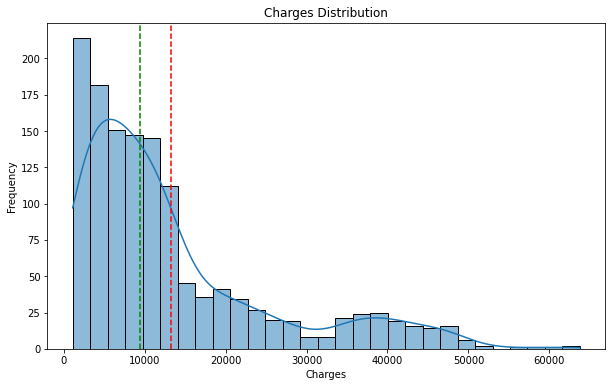

Skewness: 1.5153909108403483
Mean: 13279.121486655948
Median: 9386.1613


In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(x='charges', data=insurance, kde=True)
plt.axvline(insurance.charges.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance.charges.median(), color='g', linestyle='--', label='Median')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {insurance["charges"].skew()}')
print(f'Mean: {(insurance["charges"].mean())}')
print(f'Median: {insurance["charges"].median()}')

Rata-rata dari klien memiliki memiliki biaya asuransi sekitar **$13,279** namun ada juga klien yang biaya asuransinya lebih dari **$60,000** dimana klien ini merupakan outlier yang menyebabkan distribusi dari kolom `charges` menjadi **Right-Skewed** dengan nilai skewness **1.5**.

### Age

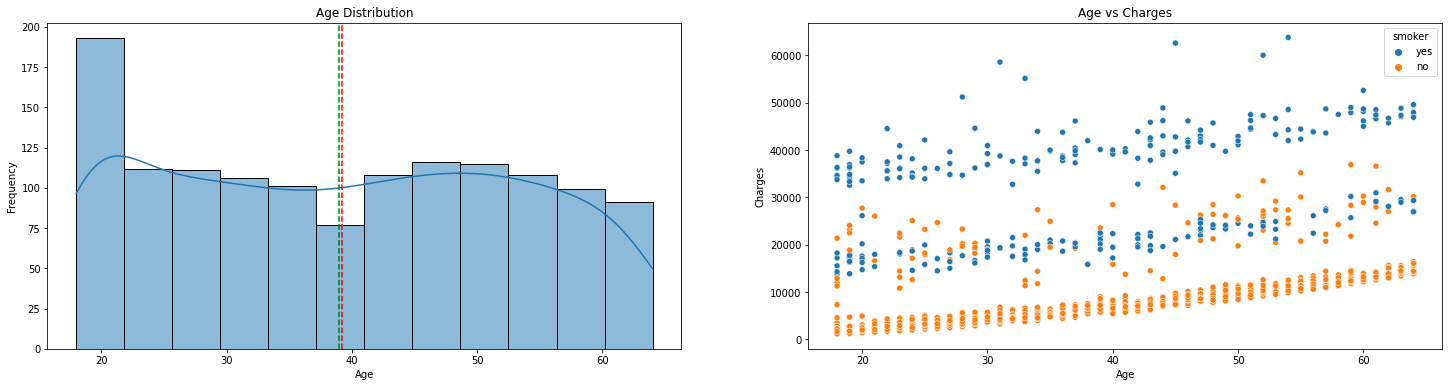

Skewness: 0.054780773126998195
Mean: 39
Median: 39.0
Minimum Age: 18
Maximum Age: 64


In [14]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=insurance, kde=True)
plt.axvline(insurance.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
print(f'Skewness: {insurance["age"].skew()}')
print(f'Mean: {(insurance["age"].mean()):.0f}')
print(f'Median: {insurance["age"].median()}')
print(f'Minimum Age: {insurance["age"].min()}')
print(f'Maximum Age: {insurance["age"].max()}')

Distribusi dari kolom `age` ini tergolong distribusi yang normal (**Symmetrical**) dengan nilai skewness mendekati 0 dan mean dengan mediannya yang saling berdekatan. Diketahui rata-rata dari klien ini berusia sekitar **39 tahun** dengan usia termudanya adalah **18 tahun** dan usia tertuanya adalah **64 tahun**. Jika dilihat dari scatter plot kita dapat mengetahui bahwa kolom `age` memiliki korelasi yang positive terhadap kolom `charges` dimana semakin tua usia klien maka biayanya juga akan semakin tinggi, dan dapat diketahui juga biaya dari seorang perokok jauh lebih tinggi dari yang bukan perokok. 

### Sex

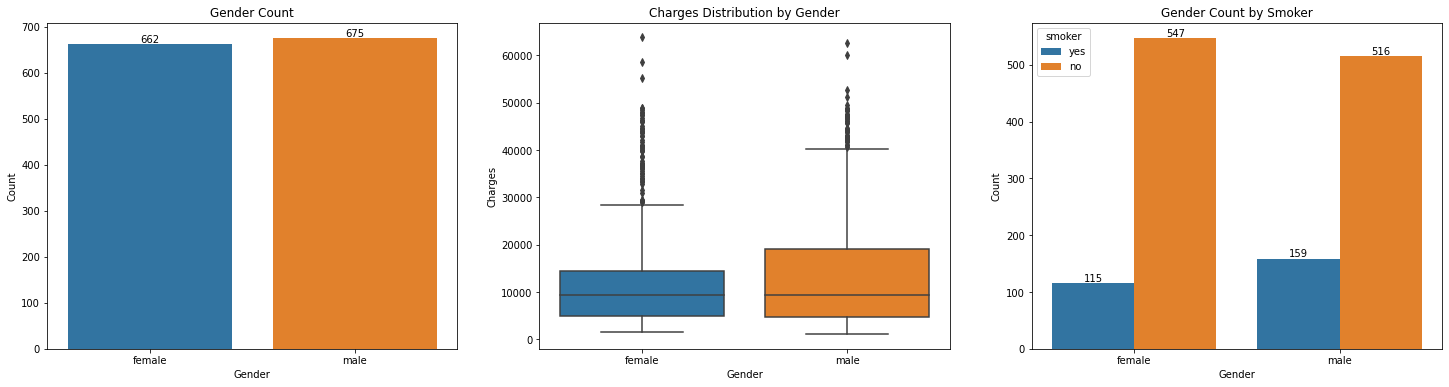

In [15]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='sex', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='sex', y='charges', data=insurance)
plt.title('Charges Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.subplot(1, 3, 3)
fig = sns.countplot(x='sex', data=insurance, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count by Smoker')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [16]:
round(insurance.groupby('sex').charges.mean(), 0).reset_index()

,sex,charges
0,female,12570.0
1,male,13975.0


Jumlah klien wanita dan pria ini tidak terlalu berbeda jauh, klien pria berjumlah 675 klien dan klien wanita berjumlah 662 klien. Namun, jika dilihat pada box plot range biaya asuransinya memiliki perbedaan yang cukup signifikan dimana rata-rata biaya asurasi untuk klien pria adalah sekitar **$13,975** sedangkan untuk klien wanita sekitar **$12,570**. Munkin hal ini disebakan karena klien pria lebih banyak yang perokok dibandingkan klien wanita.

### Body Mass Index (BMI)

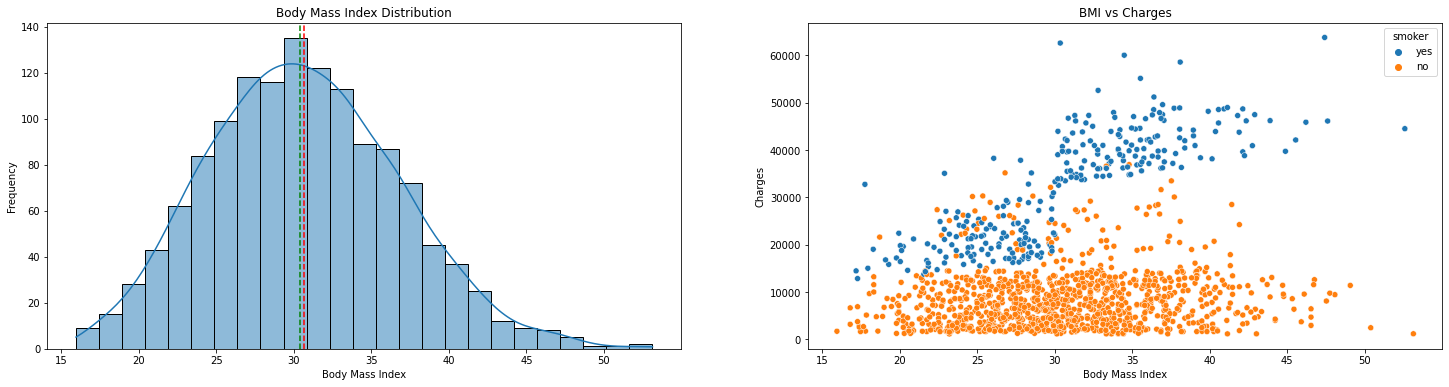

Skewness: 0.28391419385321137
Mean: 30.66345175766642
Median: 30.4


In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=insurance, kde=True)
plt.axvline(insurance.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()
print(f'Skewness: {insurance["bmi"].skew()}')
print(f'Mean: {(insurance["bmi"].mean())}')
print(f'Median: {insurance["bmi"].median()}')

Rata-rata dari klien memiliki BMI sekitar **31 kg/m2**, kolom `bmi` ini memiliki distribusi yang normal dengan bentuk seperti lonceng. Outlier pada kolom ini juga sangat sedikit maka mungkin outlier pada kolom `bmi` akan dibiarkan. Jika dilihat dari scatter plot diatas kolom `bmi` memiliki korelasi yang positive dengan kolom `charges` walaupun tergolong lemah, karena jika klien bukan perokok biaya asuransinya naik tidak terlalu tinggi, sedangkan jika klien seorang perokok maka makin tinggi body mass indexnya akan semakin tinggi juga biaya asuransinya.

### Children

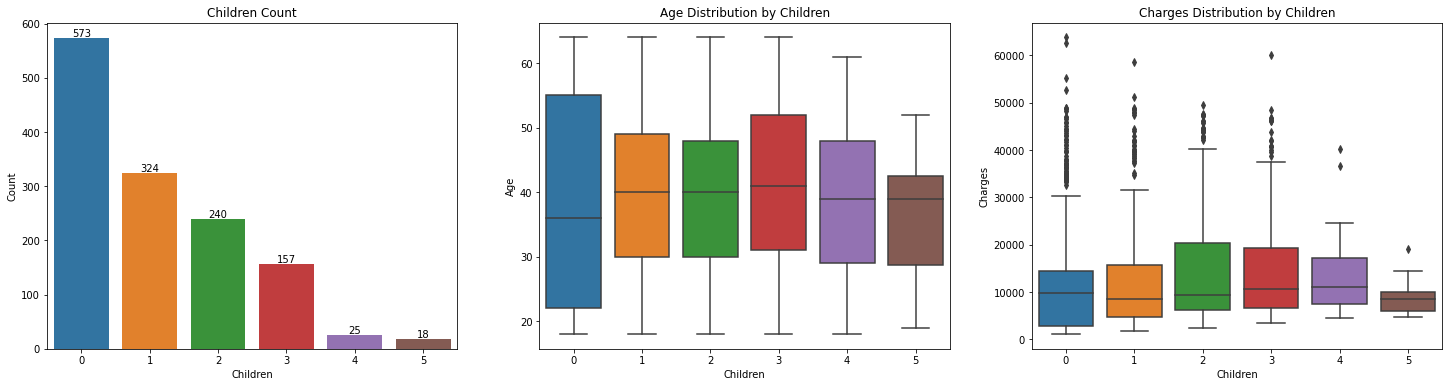

Mean: 1


In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='children', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Children Count')
plt.xlabel('Children')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='children', y='age', data=insurance)
plt.title('Age Distribution by Children')
plt.xlabel('Children')
plt.ylabel('Age')
plt.subplot(1, 3, 3)
sns.boxplot(x='children', y='charges', data=insurance)
plt.title('Charges Distribution by Children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()
print(f'Mean: {(insurance["children"].mean()):.0f}')

Rata-rata jumlah anak dari klien asuransi ini adalah **1** namun ada sekitar **573 klien** yang tidak memiliki anak. Dan berdasarkan box plot antara kolom `children` dan kolom `charges`, kedua kolom ini memiliki hubungan positive yang lemah.

### Smoker

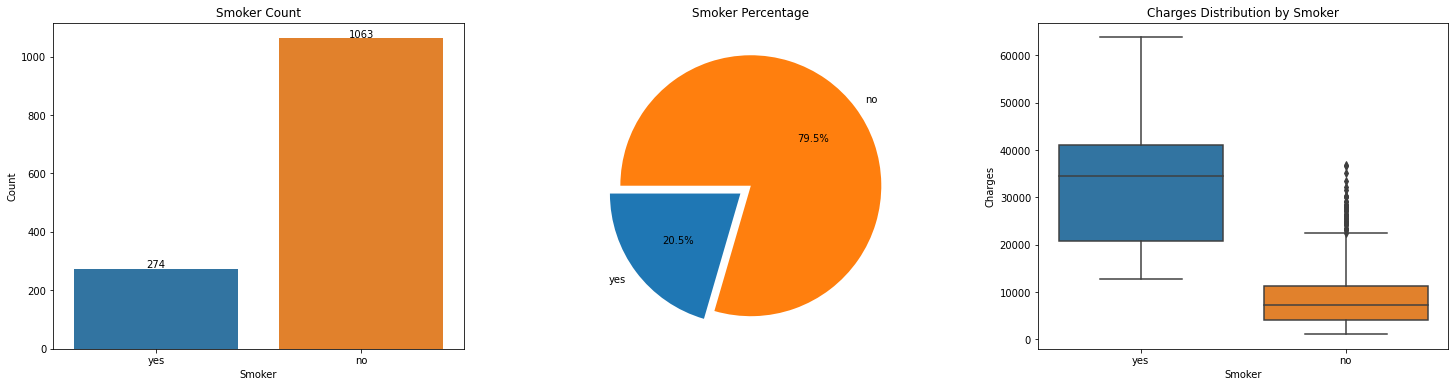

Average Charges for Smokers: $32050
Average Charges for Non-Smokers: $8441


In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='smoker', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(insurance.smoker.value_counts().reindex(['yes', 'no']), labels=insurance.smoker.value_counts().reindex(['yes', 'no']).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')
plt.subplot(1, 3, 3)
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
print(f"Average Charges for Smokers: ${(insurance[insurance.smoker == 'yes'].charges.mean()):.0f}")
print(f"Average Charges for Non-Smokers: ${(insurance[insurance.smoker == 'no'].charges.mean()):.0f}")

Jumlah perokok adalah **274 klien** atau hanya sekitar 20% saja dari seluruh klien asuransi, namun walaupun jumlahnya sedikit tetapi biaya yang harus dibayar oleh seorang perokok adalah sekitar **$32,050** jauh lebih besar dari yang bukan perokok yaitu **$8,441**.

### Region

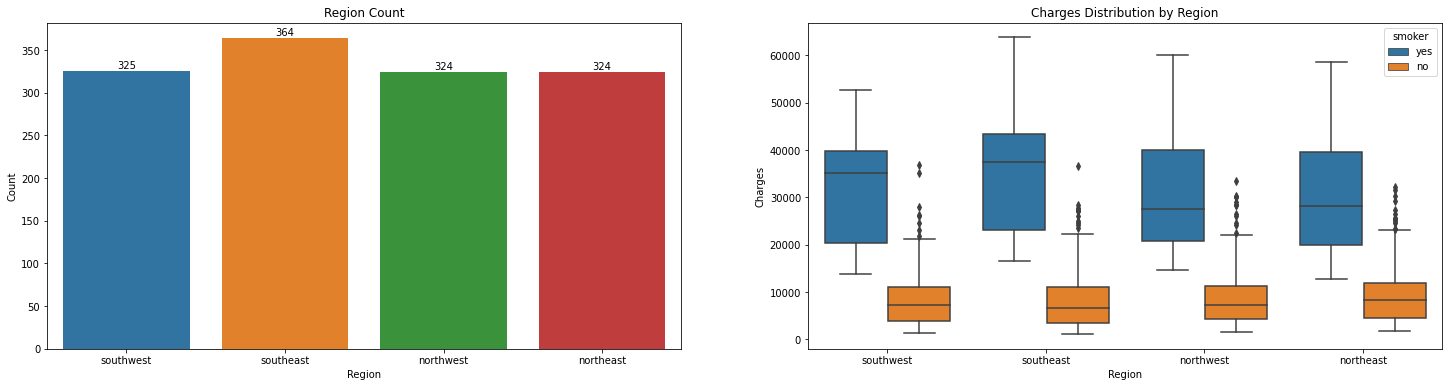

In [20]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='region', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Region Count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='charges', data=insurance, hue='smoker')
plt.title('Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Jika dilihat dari bar plot klien dari perusahaan asuransi ini kebanyakan berasal dari region **southeast** yaitu sebanyak **364 klien** sedangkan dari region lain hanya sekitar **324 klien**. Namun, jika dilihat dari box plot antara kolom `region` dan kolom `charges` ini tidak memiliki korelasi walaupun biaya asuransi seorang perokok di region southeast lebih besar dari region lain, mungkin ini disebabkan karena di region southeast lebih banyak perokok dibandingkan region lain.

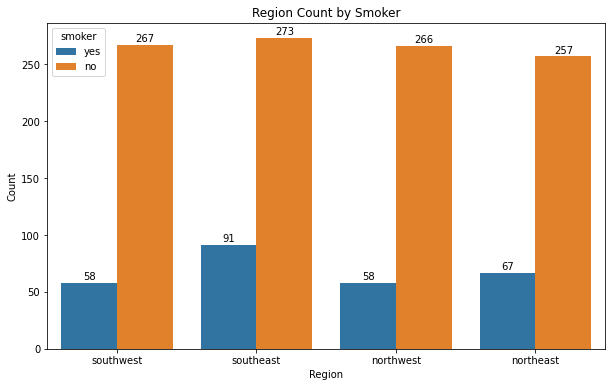

In [21]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x='region', data=insurance, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Region Count by Smoker')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Ternyata benar, jumlah perokok di region southeast lebih banyak dari region lain yaitu sebanyak **91 klien**.

### Correlation Matrix Between Numerical Columns To Target

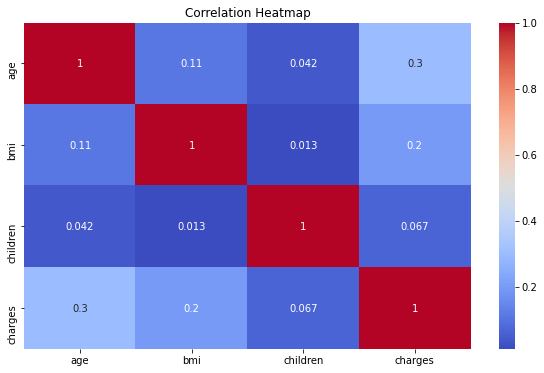

In [22]:
corr_num = insurance.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap diatas ternyata kolom `children` tidak memiliki korelasi terhadap kolom `charges`. Maka, kolom children tidak akan digunakan sebagai feature dan akan dihapus dari dataframe.

In [23]:
insurance = insurance.drop(columns=['children'])

### Correlation Between Categorical Columns To Target

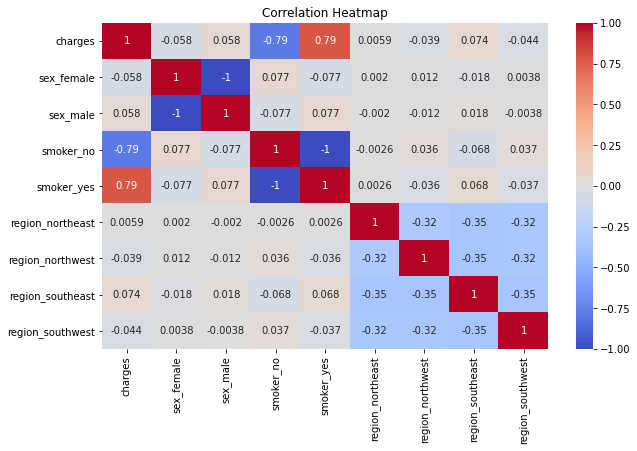

In [24]:
corr_cat = pd.get_dummies(insurance[['charges', 'sex', 'smoker', 'region']]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_cat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Kolom `charges` berkorelasi cukup tinggi dengan kolom `smoker`. Maka, kolom categorical lainnya akan didrop dari dataframe kerena tidak akan digunakan sebagai feature.

In [25]:
insurance = insurance.drop(columns=['sex', 'region'])

In [26]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1337 non-null   int64  
 1   bmi      1337 non-null   float64
 2   smoker   1337 non-null   object 
 3   charges  1337 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 84.5+ KB


Sekarang dataframe hanya memiliki 4 kolom yaitu `age`, `bmi`, dan `smoker` sebagai featurenya dan kolom `charges` yang akan menjadi targetnya.

## Data Preprocessing

### Split Data

Pada bagian ini akan dilakukan pemisahan (**splitting**) data untuk training set, validation set, dan testing set dengan perbandingan **7:2:1**, dimana:
- **70%** data menjadi **training set**
- **20%** data menjadi **validation set**
- **10%** data menjadi **testing set**

In [27]:
df_train_val, df_test = train_test_split(insurance, test_size=0.05, random_state=23)
df_train, df_val = train_test_split(df_train_val, test_size=0.1, random_state=23)

In [28]:
print(f'df_train proportion: {len(df_train) / len(insurance):.2f}')
print(f'df_val proportion: {len(df_val) / len(insurance):.2f}')
print(f'df_test proportion: {len(df_test) / len(insurance):.2f}')

df_train proportion: 0.85
df_val proportion: 0.09
df_test proportion: 0.05


### Outlier Handling

Pada bagian ini akan dilakukan **outlier handling** untuk `df_train`.

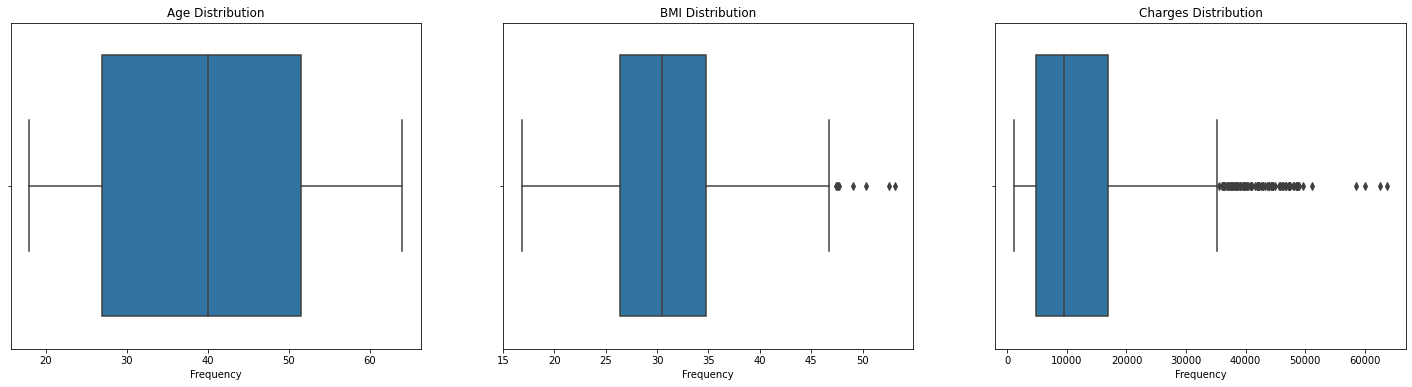

In [29]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='age', data=df_train)
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 2)
sns.boxplot(x='bmi', data=df_train)
plt.title('BMI Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(x='charges', data=df_train)
plt.title('Charges Distribution')
plt.xlabel('Frequency')
plt.show()

Jika dilihat dari ketiga box plot dari kolom-kolom numerik sepertinya hanya terdapat outlier pada kolom `charges` saja, karena kolom `charges` memiliki distribusi yang **Skewed** maka akan dilakukan pengecekan outlier menggunakan **IQR**.

In [30]:
# Outlier Detection For Skewed Distribution
def skewed_dis(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)] 

In [31]:
outliers = skewed_dis(df_train, 'charges')
print(f"Outlier percentage: {(len(outliers) / len(df_train) * 100):.1f}%")
outliers

Outlier percentage: 9.7%


,age,bmi,smoker,charges
668,62,32.015,yes,45710.20785
298,31,34.390,yes,38746.35510
629,44,38.950,yes,42983.45850
826,56,31.790,yes,43813.86610
14,27,42.130,yes,39611.75770
...,...,...,...,...
697,41,35.750,yes,40273.64550
34,28,36.400,yes,51194.55914
883,51,37.050,yes,46255.11250
338,50,32.300,yes,41919.09700


Tabel diatas merupakan data dari klien yang merupakan outliers, ada sekitar 10% klien atau 100 klien yang tergolong sebagai outliers pada `df_train`. Jika dilihat dari kolom `smoker` sepertinya kebanyakan dari outlier ini merupakan seorang perokok, akan dilakukan analisa pada data outliers ini untuk ditarik kesimpulan akan dihapus, dicapping, atau dibiarkan.

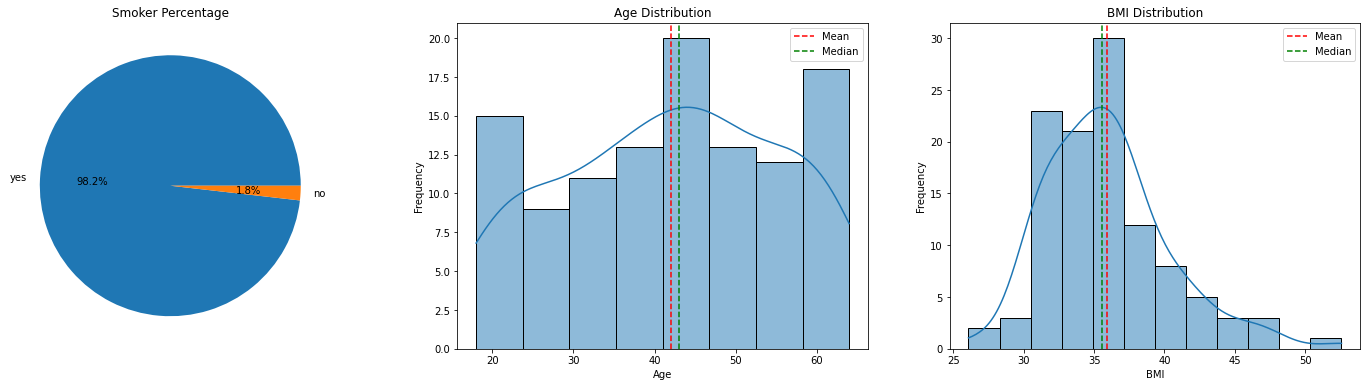

In [32]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.pie(outliers.smoker.value_counts().reindex(['yes', 'no']), labels=outliers.smoker.value_counts().reindex(['yes', 'no']).index, autopct='%1.1f%%')
plt.title('Smoker Percentage')
plt.subplot(1, 3, 2)
sns.histplot(x='age', data=outliers, kde=True)
plt.axvline(outliers.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(outliers.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(x='bmi', data=outliers, kde=True)
plt.axvline(outliers.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(outliers.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [33]:
print(f'Average Charges From Outliers: ${(outliers.charges.mean()):.0f}')
print(f'Average Age From Outliers: {outliers.age.mean():.0f}')
print(f'Average BMI From Outliers: {outliers.bmi.mean():.0f}')

Average Charges From Outliers: $42615
Average Age From Outliers: 42
Average BMI From Outliers: 36


Ternyata benar, **98% klien** pada data outliers ini merupakan perokok dengan rata-rata usia dan BMI diatas rata-rata. Karena hapir seluruh klien yang menjadi outlier ini adalah seorang perokok dengan usia dan BMI diatas rata-rata maka sangat wajar jika biaya asuransi atau `charges` mereka besar, oleh karena itu **outlier akan dibiarkan**.

### Feature Selection

Berdasarkan hasil **EDA** kolom yang akan dijadikan feature adalah:
- `age`
- `bmi`
- `smoker`

Sedangkan kolom `charges` akan menjadi targetnya.

In [34]:
# Training Set
X_train = df_train.drop(columns=['charges'])
y_train = df_train.charges

# Validation Set
X_val = df_val.drop(columns=['charges'])
y_val = df_val.charges

### Pipeline

Pada bagian ini akan dibuat pipeline untuk melakukan **scaling** menggunakan `StandardScaler()` dan melakukan **encoding** menggunakan `OneHotEncoder()` lalu features akan dilakukan **dimensionality reduction** menggunakan `PCA()` dengan `n_component = 0.95` yang berarti mereduksi dimensi dengan mempertahankan **95%** informasi dari data. 

In [35]:
# Numeric Features Scaling
num_pipe = Pipeline([('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

Membuat pipeline untuk model Polynomial Regression dan Extreme Gradient Booting Regressor.

In [36]:
poly_lr_pipe = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('poly', PolynomialFeatures()), ('model', LinearRegression())])
xgbr_pipe = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', XGBRegressor())])

Membuat dictionary yang berisi hyperparameter untuk model `poly` dan `xgbr`. 

In [37]:
poly_params = {'poly__degree': [2, 3, 4]}
xgbr_params = {'model__n_estimators': [400, 450, 475], 'model__max_depth': [2, 3, 4], 'model__learning_rate': [0.1, 1], 'model__subsample': [0.25, 0.5, 0.75]}

## Model Definition

Akan dibuat 3 model, yaitu:
- `linear` adalah model **Linear Regression** biasa
- `poly` adalah model **Linear Regression** dengan **Polynomial Features** yang akan dituning menggunakan grid search dengan **5 cross-validation**
- `xgbr` adalah model **Extreme Gradient Boosting Regressor** yang akan dituning menggunakan grid search dengan **5 cross-validation**

In [38]:
linear = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', LinearRegression())])
poly = GridSearchCV(poly_lr_pipe, param_grid=poly_params, cv=5)
xgbr = GridSearchCV(xgbr_pipe, param_grid=xgbr_params, cv=5)

## Model Training

Setelah model dibuat, sekarang setiap model akan dilatih menggunakan `X_train` dan `y_train`.

In [39]:
%timeit linear.fit(X_train, y_train)
%timeit poly.fit(X_train, y_train)
%timeit xgbr.fit(X_train, y_train)

8.18 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
297 ms ± 61.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2min 13s ± 1.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
poly.best_params_

{'poly__degree': 3}

In [41]:
xgbr.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 2,
 'model__n_estimators': 400,
 'model__subsample': 0.5}

Dari hasil grid search didapatkan model linear regression dengan polynomial features dengan **degree 3** adalah hyperparameter terbaiknya.

## Model Evaluation

Pada bagian ini setiap model yang sudah dilatih akan dievaluasi menggunakan metric evaluasi $R^2 Score$ dan $Mean Absolute Error$ (MAE).

### Base Linear Regression

In [42]:
print('-----------Training Set-----------')
print(f'Training Score: {linear.score(X_train, y_train):.2f}')
print(f'Training MAE: {mean_absolute_error(y_train, linear.predict(X_train)):.2f}')

print('-----------Validation Set-----------')
print(f'Validation Score: {linear.score(X_val, y_val):.2f}')
print(f'Validation MAE: {mean_absolute_error(y_val, linear.predict(X_val)):.2f}')

-----------Training Set-----------
Training Score: 0.75
Training MAE: 4216.70
-----------Validation Set-----------
Validation Score: 0.74
Validation MAE: 4105.28


### Polynomial Regression

In [43]:
print('-----------Training Set-----------')
print(f'Training Score: {poly.score(X_train, y_train):.2f}')
print(f'Training MAE: {mean_absolute_error(y_train, poly.predict(X_train)):.2f}')

print('-----------Validation Set-----------')
print(f'Validation Score: {poly.score(X_val, y_val):.2f}')
print(f'Validation MAE: {mean_absolute_error(y_val, poly.predict(X_val)):.2f}')

-----------Training Set-----------
Training Score: 0.84
Training MAE: 2883.55
-----------Validation Set-----------
Validation Score: 0.83
Validation MAE: 2934.67


### Extreme Gradient Boosting Regressor

In [44]:
print('-----------Training Set-----------')
print(f'Training Score: {xgbr.score(X_train, y_train):.2f}')
print(f'Training MAE: {mean_absolute_error(y_train, xgbr.predict(X_train)):.2f}')

print('-----------Validation Set-----------')
print(f'Validation Score: {xgbr.score(X_val, y_val):.2f}')
print(f'Validation MAE: {mean_absolute_error(y_val, xgbr.predict(X_val)):.2f}')

-----------Training Set-----------
Training Score: 0.91
Training MAE: 2188.20
-----------Validation Set-----------
Validation Score: 0.83
Validation MAE: 2934.32


### Model Analysis

Dari hasil evaluasi model **Linear Regression** biasa mengalami sedikit overfitting dengan **R2 Score 0.75** dan **MAE 4216** pada training setnya lalu pada validation setnya mendapat **R2 Score 0.74** dan **MAE 4160**. Sedangkan untuk model **Polynomial Regression** yang dituning menggunakan grid search didapatkan best parameter untuk Polynomial Featuresnya adalah **degree = 3**, model ini menghasilkan **R2 Score 0.84** dan **MAE 2883** pada training setnya dan pada validation setnya mendapat **R2 Score 0.83** dan **MAE 2934** dimana model ini jauh lebih besar dari model Linear Regression biasa walapun kedua model ini mengalami overfitting.

## Model Testing (Data Inference)

Setelah kedua model dilatih dan dievaluasi sekarang model yang memiliki score paling tinggi yaitu **Polynomial Regression** akan diuji menggunakan data testing set (inference).

In [45]:
df_test

,age,bmi,smoker,charges
634,51,39.700,no,9391.34600
1198,40,29.355,no,6393.60345
207,35,27.740,yes,20984.09360
714,24,22.600,no,2457.50200
616,56,28.595,no,11658.11505
...,...,...,...,...
194,18,34.430,no,1137.46970
1193,48,36.575,no,8671.19125
274,25,27.550,no,2523.16950
1248,18,39.820,no,1633.96180


Testing set ini berjumlah **67 baris** data.

### Prediction

Melakukan prediksi terhadap `df_test`.

In [47]:
# Split Features and Target
X_test = df_test.drop(columns=['charges'])
y_test = df_test.charges

# Predict X_test Using Polynomial Regression
pred = poly.predict(X_test)

# Create DataFrame
predictions = df_test.copy()
predictions['predictions'] = pred
predictions.head(10)

,age,bmi,smoker,charges,predictions
634,51,39.700,no,9391.34600,11746.693880
1198,40,29.355,no,6393.60345,7922.244140
207,35,27.740,yes,20984.09360,26885.175053
714,24,22.600,no,2457.50200,4043.613488
616,56,28.595,no,11658.11505,12937.943898
1308,25,30.200,yes,33900.65300,28239.770104
955,31,39.490,no,3875.73410,6376.065609
353,33,35.245,no,12404.87910,6831.170050
25,59,27.720,no,14001.13380,13936.253940
1240,52,41.800,yes,47269.85400,51626.119983


In [48]:
print('-----------Testing Set-----------')
print(f'Score: {poly.score(X_test, y_test):.2f}')
print(f'MAE: {mean_absolute_error(y_test, poly.predict(X_test)):.2f}')

-----------Testing Set-----------
Score: 0.82
MAE: 3034.80
